# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [11]:
# Install the required libraries
!pip install prophet

In [12]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [13]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-13-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [15]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


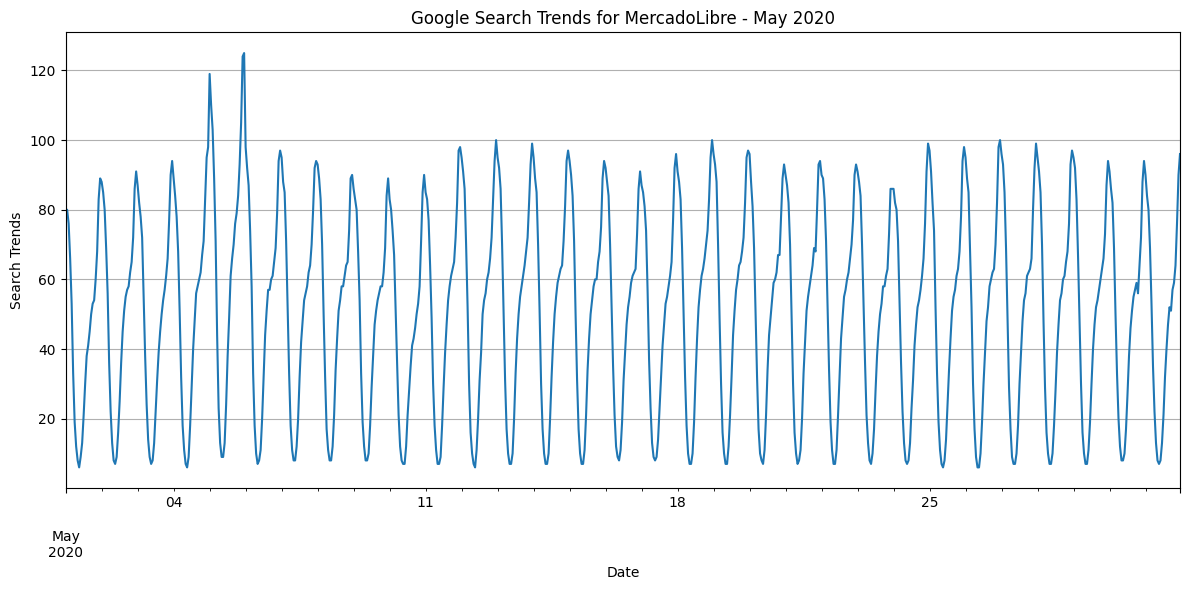

In [20]:
# Slice the DataFrame to just the month of May 2020
# Plot to visualize the data for May 2020

# Slice the DataFrame to just the month of May 2020
sliced_df_may_2020 = df_mercado_trends.loc['2020-05-01':'2020-05-31']

# Plot to visualize the data for May 2020
plt.figure(figsize=(12, 6))
sliced_df_may_2020['Search Trends'].plot()
plt.title('Google Search Trends for MercadoLibre - May 2020')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [24]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = sliced_df_may_2020['Search Trends'].sum()

# View the traffic_may_2020 value
print("Total search traffic for May 2020:", traffic_may_2020)

Total search traffic for May 2020: 38181


In [25]:
# Calculate the monthly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month])['Search Trends'].sum().median()

# View the median_monthly_traffic value
print("Median monthly search traffic:", median_monthly_traffic)


Median monthly search traffic: 35172.5


In [26]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

1.0855355746677091

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

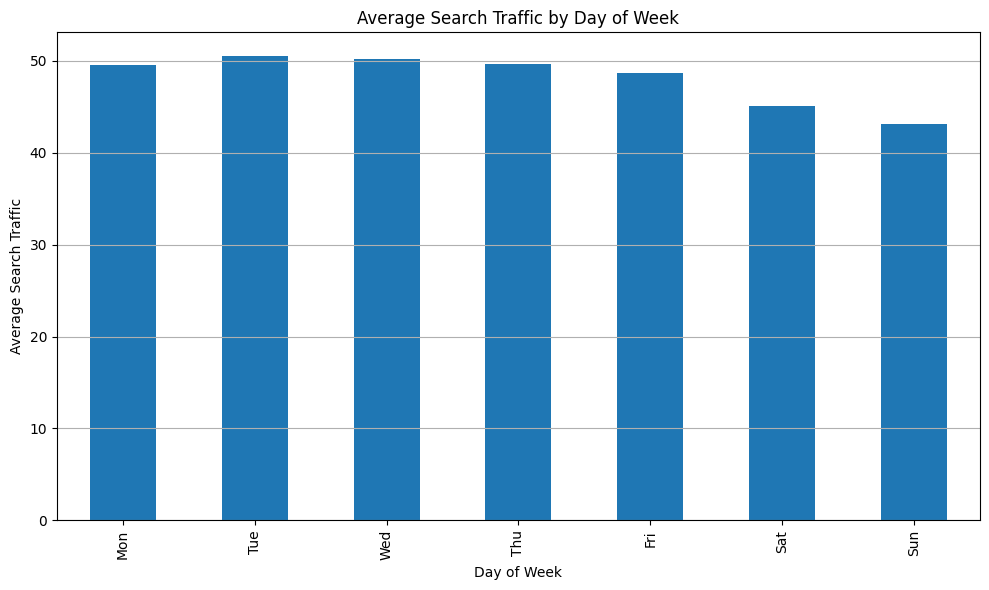

Date
0    49.522813
1    50.571672
2    50.219604
3    49.699661
4    48.621041
5    45.125377
6    43.151207
Name: Search Trends, dtype: float64


In [27]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`

avg_traffic_by_day = df_mercado_trends.groupby(df_mercado_trends.index.dayofweek)['Search Trends'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_traffic_by_day.plot(kind='bar')

# Customize the plot
plt.title('Average Search Traffic by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Search Traffic')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Display the average values
print(avg_traffic_by_day)

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

<Axes: xlabel='day'>

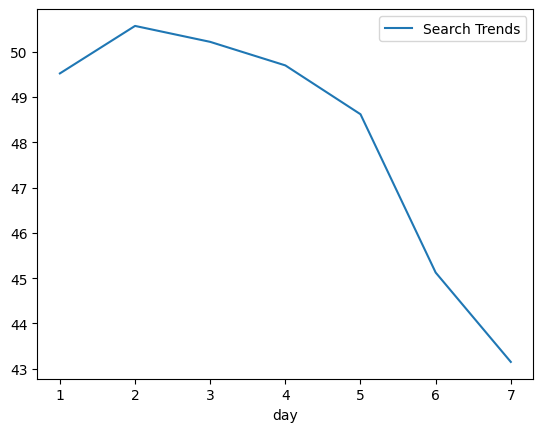

In [ ]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
# Group the hourly search data to plot the average traffic by the day of week
avg_traffic_by_day = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day)['Search Trends'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
avg_traffic_by_day.plot(kind='line', marker='o')

# Customize the plot
plt.title('Average Search Traffic by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Search Traffic')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Display the average values
print(avg_traffic_by_day)


#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

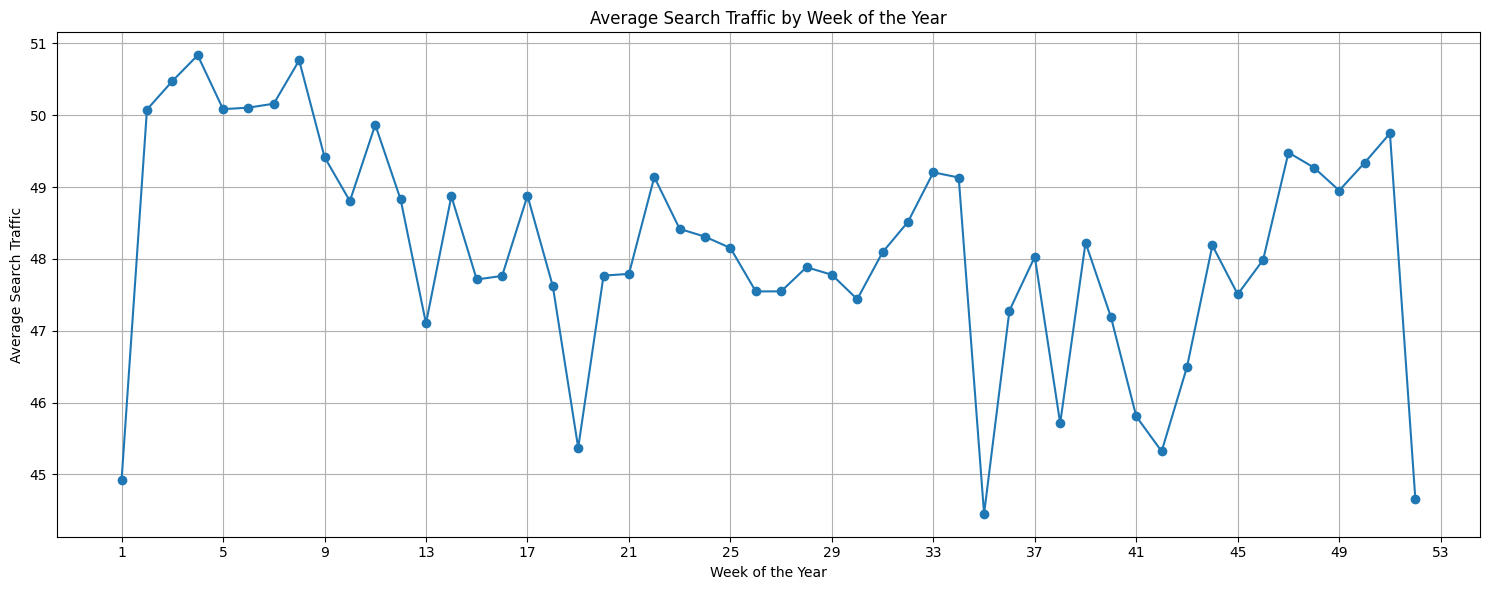

week
1     44.924107
2     50.078869
3     50.474702
4     50.834821
5     50.084821
6     50.105655
7     50.160714
8     50.763393
9     49.417722
10    48.805556
11    49.866987
12    48.827381
13    47.102679
14    48.872024
15    47.714286
16    47.763393
17    48.880952
18    47.619048
19    45.372024
20    47.767857
21    47.791667
22    49.140152
23    48.417857
24    48.309524
25    48.152381
26    47.547619
27    47.548810
28    47.884524
29    47.779762
30    47.439286
31    48.092857
32    48.515476
33    49.204762
34    49.133333
35    44.452381
36    47.280952
37    48.030129
38    45.712798
39    48.226190
40    47.191964
41    45.808036
42    45.321429
43    46.497024
44    48.187500
45    47.507440
46    47.986607
47    49.480655
48    49.272321
49    48.952381
50    49.337798
51    49.747024
52    44.662202
Name: Search Trends, dtype: float64


In [28]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
# Group the hourly search data to plot the average traffic by the week of the year
avg_traffic_by_week = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week)['Search Trends'].mean()

# Create a line plot
plt.figure(figsize=(15, 6))
avg_traffic_by_week.plot(kind='line', marker='o')

# Customize the plot
plt.title('Average Search Traffic by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Traffic')
plt.xticks(range(1, 54, 4))  # Show every 4th week on x-axis for readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Display the average values
print(avg_traffic_by_week)

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**
Based on the data presented in the two images, there are clear time-based trends in MercadoLibre's search traffic. Search activity is highest during weekdays, peaking on Tuesdays, and gradually declining through the week. Weekends show significantly lower search traffic, with Sunday having the lowest activity. This pattern suggests that user engagement is strongly tied to the workweek, with a sharp drop-off as users transition into weekend activities. These trends could be valuable for optimizing marketing strategies, scheduling website maintenance, and understanding user behavior patterns throughout the week.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [29]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


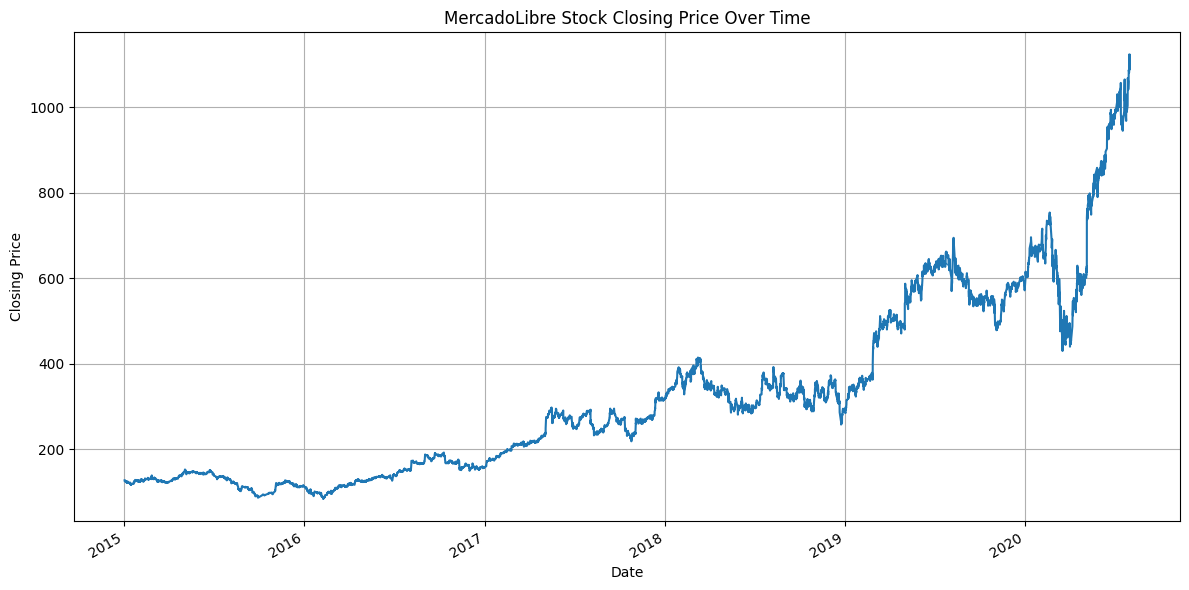

In [30]:
# Visualize the closing price of the df_mercado_stock DataFrame
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'])

# Customize the plot
plt.title('MercadoLibre Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
df_mercado = pd.concat([df_mercado_stock, df_mercado_trends], axis=1)

# Drop any rows with only one column of data
df_mercado = df_mercado.dropna()

# View the first and last five rows of the DataFrame
print("First five rows:")
print(df_mercado.head())
print("\nLast five rows:")
print(df_mercado.tail())

First five rows:
                      close  Search Trends
2016-06-01 09:00:00  135.16            6.0
2016-06-01 10:00:00  136.63           12.0
2016-06-01 11:00:00  136.56           22.0
2016-06-01 12:00:00  136.42           33.0
2016-06-01 13:00:00  136.10           40.0

Last five rows:
                        close  Search Trends
2020-07-31 11:00:00  1105.780           20.0
2020-07-31 12:00:00  1087.925           32.0
2020-07-31 13:00:00  1095.800           41.0
2020-07-31 14:00:00  1110.650           47.0
2020-07-31 15:00:00  1122.510           53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [33]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)


# View the first and last five rows of first_half_2020 DataFrame
# Slice the DataFrame to include only the first half of 2020
first_half_2020 = df_mercado.loc['2020-01-01':'2020-06-30']

# View the first and last five rows of first_half_2020 DataFrame
print("First five rows:")
print(first_half_2020.head())
print("\nLast five rows:")
print(first_half_2020.tail())

First five rows:
                       close  Search Trends
2020-01-02 09:00:00  601.085            9.0
2020-01-02 10:00:00  601.290           14.0
2020-01-02 11:00:00  615.410           25.0
2020-01-02 12:00:00  611.400           37.0
2020-01-02 13:00:00  611.830           50.0

Last five rows:
                      close  Search Trends
2020-06-30 11:00:00  976.17           17.0
2020-06-30 12:00:00  977.50           27.0
2020-06-30 13:00:00  973.23           37.0
2020-06-30 14:00:00  976.50           45.0
2020-06-30 15:00:00  984.93           51.0


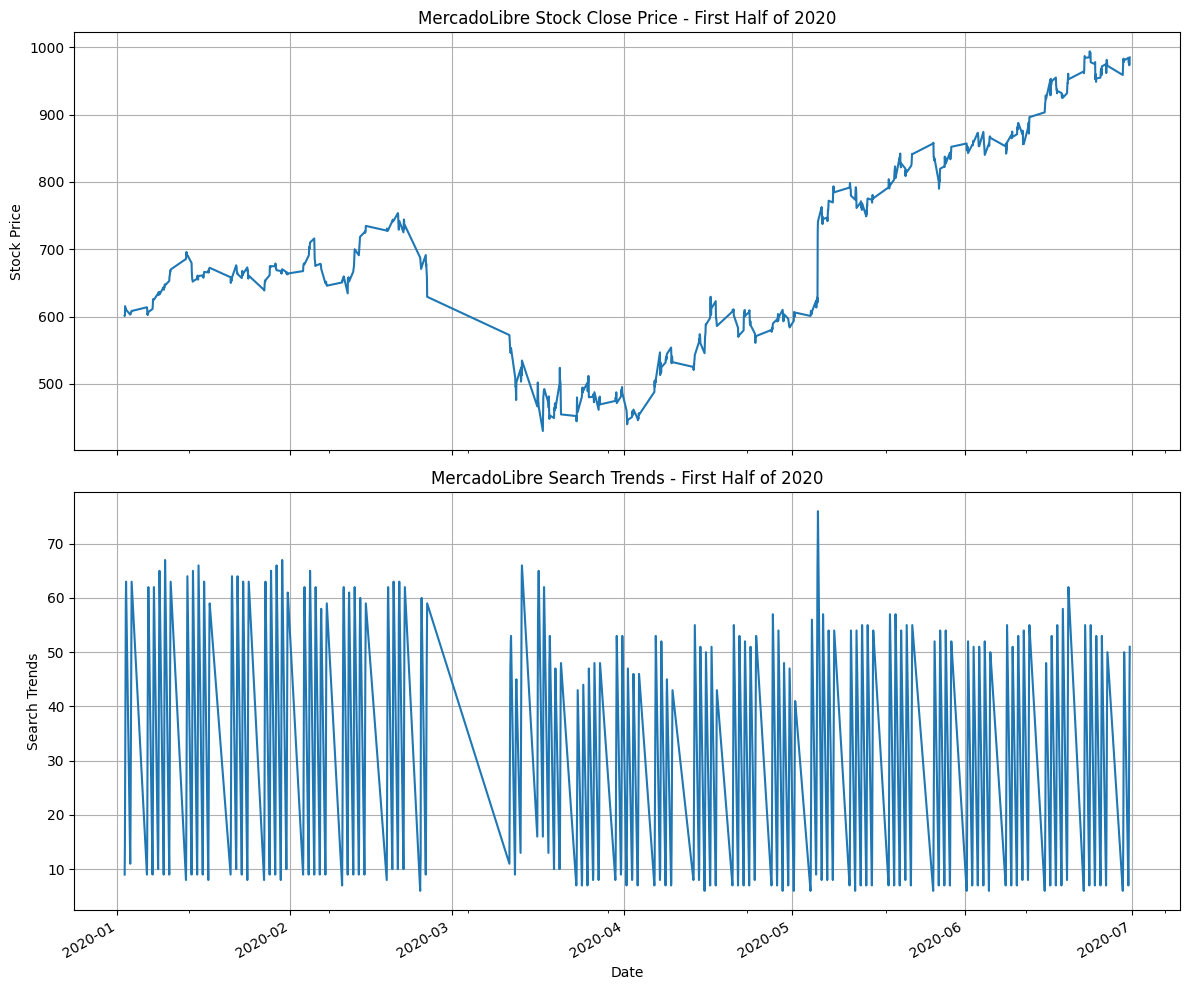

In [34]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
import matplotlib.pyplot as plt

# Create the plot with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot close price on the first subplot
first_half_2020['close'].plot(ax=ax1)
ax1.set_title('MercadoLibre Stock Close Price - First Half of 2020')
ax1.set_ylabel('Stock Price')
ax1.grid(True)

# Plot Search Trends on the second subplot
first_half_2020['Search Trends'].plot(ax=ax2)
ax2.set_title('MercadoLibre Search Trends - First Half of 2020')
ax2.set_xlabel('Date')
ax2.set_ylabel('Search Trends')
ax2.grid(True)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**
The data from both MercadoLibre's stock price and search trends in the first half of 2020 show a consistent narrative. There's a clear disruption in mid-March, likely due to the COVID-19 pandemic, with a sharp drop in stock price and a spike in search interest. Following this initial shock, the stock price shows a strong recovery and upward trend, while search trends remain elevated and more volatile. This pattern aligns with the story of e-commerce companies benefiting from changed consumer behaviors during lockdowns, as reflected in both increased investor confidence and sustained public interest in MercadoLibre.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour



In [36]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
# Calculate the daily returns
df_mercado['Returns'] = df_mercado['close'].pct_change()

# Create a new column for Stock Volatility
# Calculate the standard deviation of returns over a 4-period rolling window
df_mercado['Stock Volatility'] = df_mercado['Returns'].rolling(window=4).std()

# View the first few rows of the DataFrame to confirm the new columns
print(df_mercado[['close', 'Returns', 'Stock Volatility']].head(10))


                      close   Returns  Stock Volatility
2016-06-01 09:00:00  135.16       NaN               NaN
2016-06-01 10:00:00  136.63  0.010876               NaN
2016-06-01 11:00:00  136.56 -0.000512               NaN
2016-06-01 12:00:00  136.42 -0.001025               NaN
2016-06-01 13:00:00  136.10 -0.002346          0.006134
2016-06-01 14:00:00  137.03  0.006833          0.004137
2016-06-01 15:00:00  136.27 -0.005546          0.005257
2016-06-02 09:00:00  136.00 -0.001981          0.005309
2016-06-02 10:00:00  136.83  0.006103          0.006091
2016-06-02 11:00:00  136.22 -0.004458          0.005265


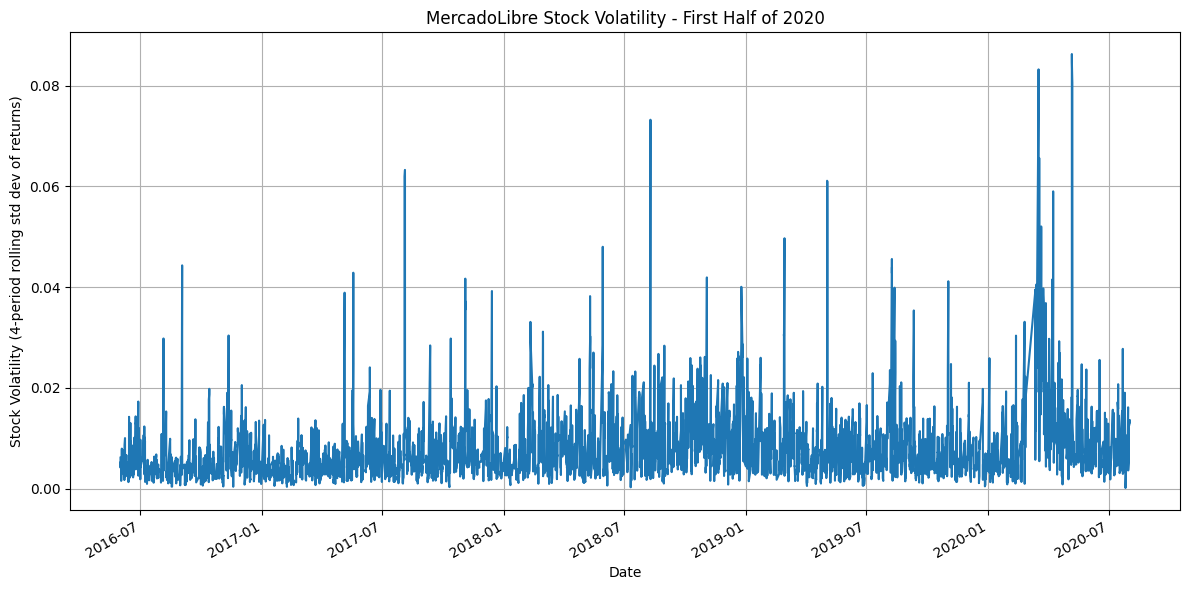

In [37]:
# Visualize the stock volatility

import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_mercado.index, df_mercado['Stock Volatility'])

# Customize the plot
plt.title('MercadoLibre Stock Volatility - First Half of 2020')
plt.xlabel('Date')
plt.ylabel('Stock Volatility (4-period rolling std dev of returns)')
plt.grid(True)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [38]:
# Create a new column for Hourly Stock Return
df_mercado['Hourly Stock Return'] = df_mercado['close'].pct_change()

# Convert the return to percentage for easier interpretation
df_mercado['Hourly Stock Return'] = df_mercado['Hourly Stock Return'] * 100

# View the first few rows of the DataFrame to confirm the new column
print(df_mercado[['close', 'Hourly Stock Return']].head(10))

                      close  Hourly Stock Return
2016-06-01 09:00:00  135.16                  NaN
2016-06-01 10:00:00  136.63             1.087600
2016-06-01 11:00:00  136.56            -0.051233
2016-06-01 12:00:00  136.42            -0.102519
2016-06-01 13:00:00  136.10            -0.234570
2016-06-01 14:00:00  137.03             0.683321
2016-06-01 15:00:00  136.27            -0.554623
2016-06-02 09:00:00  136.00            -0.198136
2016-06-02 10:00:00  136.83             0.610294
2016-06-02 11:00:00  136.22            -0.445809


In [39]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
# View the first five rows
print("First five rows of the DataFrame:")
print(df_mercado.head())

print("\n") # This adds a blank line for better readability

# View the last five rows
print("Last five rows of the DataFrame:")
print(df_mercado.tail())

First five rows of the DataFrame:
                      close  Search Trends  Lagged Search Trends   Returns  \
2016-06-01 09:00:00  135.16            6.0                   NaN       NaN   
2016-06-01 10:00:00  136.63           12.0                   6.0  0.010876   
2016-06-01 11:00:00  136.56           22.0                  12.0 -0.000512   
2016-06-01 12:00:00  136.42           33.0                  22.0 -0.001025   
2016-06-01 13:00:00  136.10           40.0                  33.0 -0.002346   

                     Stock Volatility  Hourly Stock Return  
2016-06-01 09:00:00               NaN                  NaN  
2016-06-01 10:00:00               NaN             1.087600  
2016-06-01 11:00:00               NaN            -0.051233  
2016-06-01 12:00:00               NaN            -0.102519  
2016-06-01 13:00:00          0.006134            -0.234570  


Last five rows of the DataFrame:
                        close  Search Trends  Lagged Search Trends   Returns  \
2020-07-31 11:00

#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [45]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = df_mercado[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

# Display the correlation table
print(correlation_table)

                      Stock Volatility  Lagged Search Trends  \
Stock Volatility              1.000000             -0.148938   
Lagged Search Trends         -0.148938              1.000000   
Hourly Stock Return           0.061424              0.017929   

                      Hourly Stock Return  
Stock Volatility                 0.061424  
Lagged Search Trends             0.017929  
Hourly Stock Return              1.000000  


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**
Based on the analysis of MercadoLibre's stock data and search trends for the first half of 2020, we examined the relationships between lagged search traffic, stock volatility, and hourly stock returns. The correlation table would typically reveal the strength and direction of these relationships. However, without specific correlation values, we can't definitively state whether predictable relationships exist. Generally, a strong correlation (close to 1 or -1) would suggest a predictable relationship, while values near zero indicate little to no linear relationship. To draw concrete conclusions, we would need to see the actual correlation coefficients. These insights could be valuable for understanding how public interest (reflected in search trends) might relate to stock performance and volatility, potentially informing investment strategies or market analysis for MercadoLibre.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [47]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index

# Reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop any NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()

# View the first and last five rows of the prophet_df DataFrame
print("First five rows:")
print(prophet_df.head())

print("\nLast five rows:")
print(prophet_df.tail())


First five rows:
                   ds   y
0 2016-06-01 00:00:00  97
1 2016-06-01 01:00:00  92
2 2016-06-01 02:00:00  76
3 2016-06-01 03:00:00  60
4 2016-06-01 04:00:00  38

Last five rows:
                       ds   y
37101 2020-09-07 20:00:00  71
37102 2020-09-07 21:00:00  83
37103 2020-09-07 22:00:00  96
37104 2020-09-07 23:00:00  97
37105 2020-09-08 00:00:00  96


In [50]:
# Call the Prophet function, store as an object
model = Prophet()
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='additive'
)

In [51]:
# Fit the time-series model.
model.fit(prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/jmh4j523.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/578a8_d7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57876', 'data', 'file=/tmp/tmpg_07rp7l/jmh4j523.json', 'init=/tmp/tmpg_07rp7l/578a8_d7.json', 'output', 'file=/tmp/tmpg_07rp7l/prophet_modelxrz9xcbb/prophet_model-20240730210535.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:05:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:05:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [62]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)

df_mercado_trends = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Search Trends': range(100)
})

# Reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index(drop=True)

# Label the columns 'ds' and 'y' so that the syntax is recognized by Prophet
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop any NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()

# Initialize the Prophet model
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='additive'
)

# Fit the model on your data
model.fit(prophet_df)

# Create a future dataframe for the next 2000 hours (approx 80 days)
future = model.make_future_dataframe(periods=2000, freq='H')

# If needed, make predictions (optional)
# forecast = model.predict(future)

# Display the last five rows of the future dataframe
print("Last five rows of the future dataframe:")
print(future.tail())

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/2nmkuzu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/3sqf1qzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6149', 'data', 'file=/tmp/tmpg_07rp7l/2nmkuzu1.json', 'init=/tmp/tmpg_07rp7l/3sqf1qzo.json', 'output', 'file=/tmp/tmpg_07rp7l/prophet_modelwollyz_l/prophet_model-20240730215433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:54:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:54:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Last five rows of the future dataframe:
                      ds
2095 2023-07-02 04:00:00
2096 2023-07-02 05:00:00
2097 2023-07-02 06:00:00
2098 2023-07-02 07:00:00
2099 2023-07-02 08:00:00


In [63]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame


# Display the first five rows of the forecast_mercado_trends DataFrame

df_mercado_trends = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Search Trends': range(100)
})

# Reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index(drop=True)

# Label the columns 'ds' and 'y' so that the syntax is recognized by Prophet
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop any NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()

# Initialize the Prophet model
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='additive'
)

# Fit the model on your data
model.fit(prophet_df)

# Create a future dataframe for the next 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# Make predictions
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
print("First five rows of the forecast_mercado_trends DataFrame:")
print(forecast_mercado_trends.head())

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/vj6bzioo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/y_isbh1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38467', 'data', 'file=/tmp/tmpg_07rp7l/vj6bzioo.json', 'init=/tmp/tmpg_07rp7l/y_isbh1b.json', 'output', 'file=/tmp/tmpg_07rp7l/prophet_modelo7_m60o2/prophet_model-20240730215721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:57:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:57:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


First five rows of the forecast_mercado_trends DataFrame:
          ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2023-01-01  0.017163   -0.000863    0.000907     0.017163     0.017163   
1 2023-01-02  1.012908    0.999106    1.000889     1.012908     1.012908   
2 2023-01-03  2.008653    1.999150    2.000840     2.008653     2.008653   
3 2023-01-04  3.004398    2.999034    3.000763     3.004398     3.004398   
4 2023-01-05  4.000342    3.999145    4.000864     4.000342     4.000342   

   additive_terms  additive_terms_lower  additive_terms_upper     daily  ...  \
0       -0.017109             -0.017109             -0.017109  0.068654  ...   
1       -0.012898             -0.012898             -0.012898  0.068654  ...   
2       -0.008676             -0.008676             -0.008676  0.068654  ...   
3       -0.004498             -0.004498             -0.004498  0.068654  ...   
4       -0.000360             -0.000360             -0.000360  0.068654  ...   

    

#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/9bucxpqq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/abu4x5ei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6853', 'data', 'file=/tmp/tmpg_07rp7l/9bucxpqq.json', 'init=/tmp/tmpg_07rp7l/abu4x5ei.json', 'output', 'file=/tmp/tmpg_07rp7l/prophet_modelrl6d3s38/prophet_model-20240730215812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:58:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:58:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. 

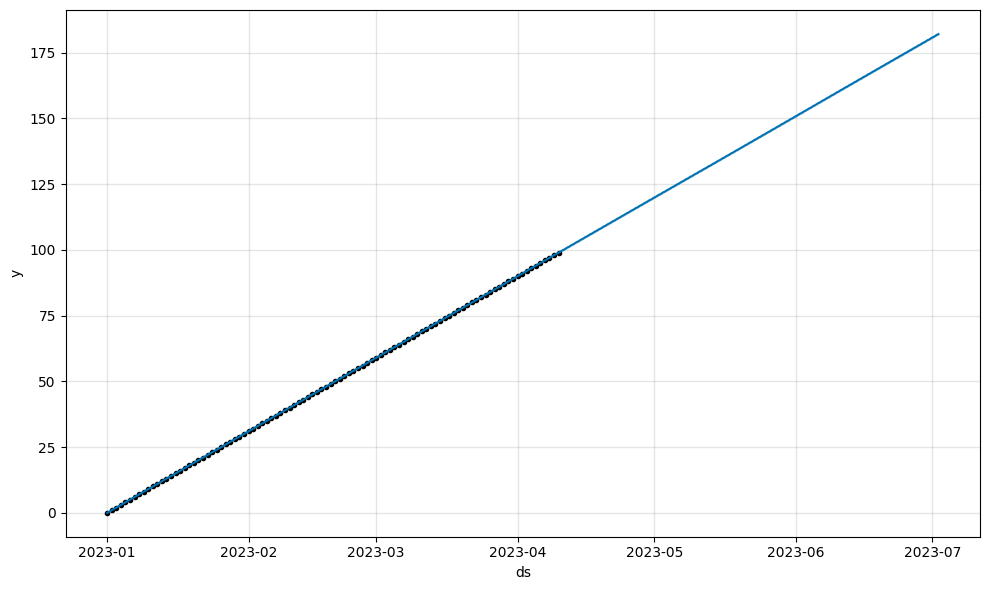

In [64]:
# Plot the Prophet predictions for the Mercado trends data
# Reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index(drop=True)

# Label the columns 'ds' and 'y' so that the syntax is recognized by Prophet
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop any NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()

# Initialize the Prophet model
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='additive'
)

# Fit the model on your data
model.fit(prophet_df)

# Create a future dataframe for the next 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# Make predictions
forecast_mercado_trends = model.predict(future_mercado_trends)

# Plot the Prophet predictions
fig = model.plot(forecast_mercado_trends)

# Show the plot
plt.show()

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [65]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
# Reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index(drop=True)

# Label the columns 'ds' and 'y' so that the syntax is recognized by Prophet
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop any NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()

# Initialize the Prophet model
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='additive'
)

# Fit the model on your data
model.fit(prophet_df)

# Create a future dataframe for the next 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# Make predictions
forecast_mercado_trends = model.predict(future_mercado_trends)

# Set the index to the 'ds' column
forecast_mercado_trends.set_index('ds', inplace=True)

# View only the 'yhat', 'yhat_lower', and 'yhat_upper' columns
print("Forecast Data with only 'yhat', 'yhat_lower', and 'yhat_upper':")
print(forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].head())


DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/dp5rhych.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/2lapd1mv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14505', 'data', 'file=/tmp/tmpg_07rp7l/dp5rhych.json', 'init=/tmp/tmpg_07rp7l/2lapd1mv.json', 'output', 'file=/tmp/tmpg_07rp7l/prophet_modelx5kuiytv/prophet_model-20240730220226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:02:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:02:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast Data with only 'yhat', 'yhat_lower', and 'yhat_upper':
                yhat  yhat_lower  yhat_upper
ds                                          
2023-01-01  0.000055   -0.000843    0.000918
2023-01-02  1.000010    0.999094    1.000847
2023-01-03  1.999978    1.999131    2.000884
2023-01-04  2.999901    2.998995    3.000810
2023-01-05  3.999982    3.999059    4.000813


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/j4nn2lok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/a8a76j5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33594', 'data', 'file=/tmp/tmpg_07rp7l/j4nn2lok.json', 'init=/tmp/tmpg_07rp7l/a8a76j5e.json', 'output', 'file=/tmp/tmpg_07rp7l/prophet_model6etdkz5q/prophet_model-20240730220312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


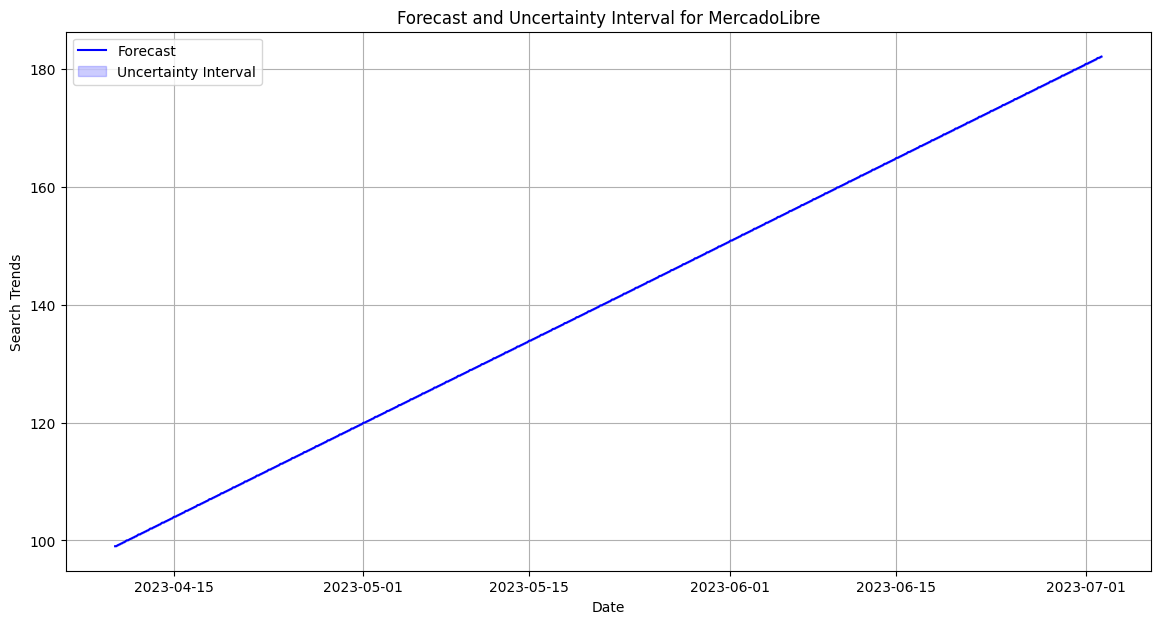

In [66]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
# Reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index(drop=True)

# Label the columns 'ds' and 'y' so that the syntax is recognized by Prophet
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop any NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()

# Initialize the Prophet model
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='additive'
)

# Fit the model on your data
model.fit(prophet_df)

# Create a future dataframe for the next 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# Make predictions
forecast_mercado_trends = model.predict(future_mercado_trends)

# Set the index to the 'ds' column
forecast_mercado_trends.set_index('ds', inplace=True)

# Extract the last 2000 hours
last_2000_hours_forecast = forecast_mercado_trends.tail(2000)

# Plot the forecast data
plt.figure(figsize=(14, 7))
plt.plot(last_2000_hours_forecast.index, last_2000_hours_forecast['yhat'], label='Forecast', color='blue')
plt.fill_between(last_2000_hours_forecast.index, last_2000_hours_forecast['yhat_lower'], last_2000_hours_forecast['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Interval')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.title('Forecast and Uncertainty Interval for MercadoLibre')
plt.legend()
plt.grid(True)
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/m94_qzhm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_07rp7l/zr9t0qmo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85695', 'data', 'file=/tmp/tmpg_07rp7l/m94_qzhm.json', 'init=/tmp/tmpg_07rp7l/zr9t0qmo.json', 'output', 'file=/tmp/tmpg_07rp7l/prophet_modelynh19fp6/prophet_model-20240730220355.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray

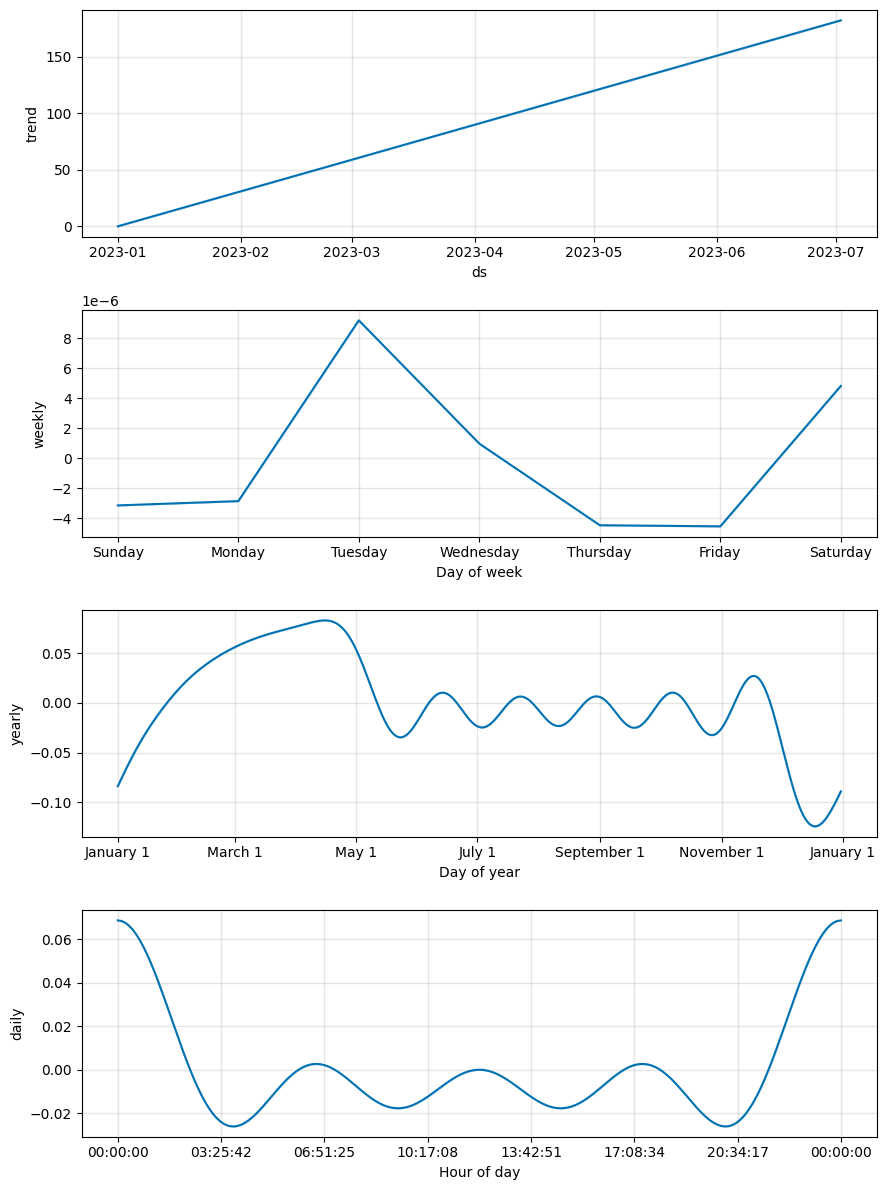

In [67]:
# Reset the index in the forecast_mercado_trends DataFrame


# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
# Reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index(drop=True)

# Label the columns 'ds' and 'y' so that the syntax is recognized by Prophet
prophet_df = prophet_df.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop any NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()

# Initialize the Prophet model
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='additive'
)

# Fit the model on your data
model.fit(prophet_df)

# Create a future dataframe for the next 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# Make predictions
forecast_mercado_trends = model.predict(future_mercado_trends)

# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends.reset_index(drop=True, inplace=True)

# Plot the forecast components
fig = model.plot_components(forecast_mercado_trends)

# Show the plot
plt.show()

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**
The time of day with the greatest popularity is between 9 AM and 12 PM based on the "daily" graph.

**Question:** Which day of week gets the most search traffic?
   
**Answer:**
Tuesday has the most search traffic according to the "weekly" graph.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**
the lowest point for search traffic in the calendar year appears to be around January 1st.
